In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

dfs = []
next_id = 0

for timestep in [1, 2, 4, 8]:
    save_dir = f'../data/newaction_{timestep}h_old'
    full_data_file = os.path.join(save_dir, f'sepsis_final_data_withTimes_newActions.csv')
    df = pd.read_csv(full_data_file)

    # 2. Remap this file’s traj IDs to a new non-overlapping range
    unique_trajs = df['traj'].unique()
    n = len(unique_trajs)
    id_map = {old: new for old, new in zip(
        unique_trajs,
        range(next_id, next_id + n)
    )}
    df['traj'] = df['traj'].map(id_map)
    next_id += n

    dfs.append(df)

# 3. Concatenate them safely
full_zs = pd.concat(dfs, ignore_index=True)

# 4. Compute trajectory lengths & counts
lengths = full_zs.groupby('traj')['step'].count()
length_counts = lengths.value_counts().sort_index()

In [4]:
# 5. Print
print("Length of each trajectory:")
print(length_counts.to_string())

Length of each trajectory:
step
1     1358
2      713
3      841
4     1572
5     2817
6     3546
7     3899
8     3687
9     2907
10    5667
11    1722
12    1898
13    1875
14    2185
15    1970
16    1677
17    1384
18    1254
19    1163
20    4310
21     835
22     875
23     986
24    1048
25     950
26     920
27    1036
28     972
29     988
30     905
31     699
32     584
33     558
34     503
35     537
36     504
37     494
38     461
39     566
40    3437
41     279
42     303
43     338
44     375
45     371
46     379
47     364
48     339
49     305
50     318
51     324
52     315
53     323
54     311
55     340
56     349
57     327
58     309
59     237
60     210
61     161
62     140
63     139
64     116
65     109
66     100
67     105
68     105
69      93
70     113
71      96
72     103
73      89
74      84
75     106
76     125
77     204
78     401
79    2563


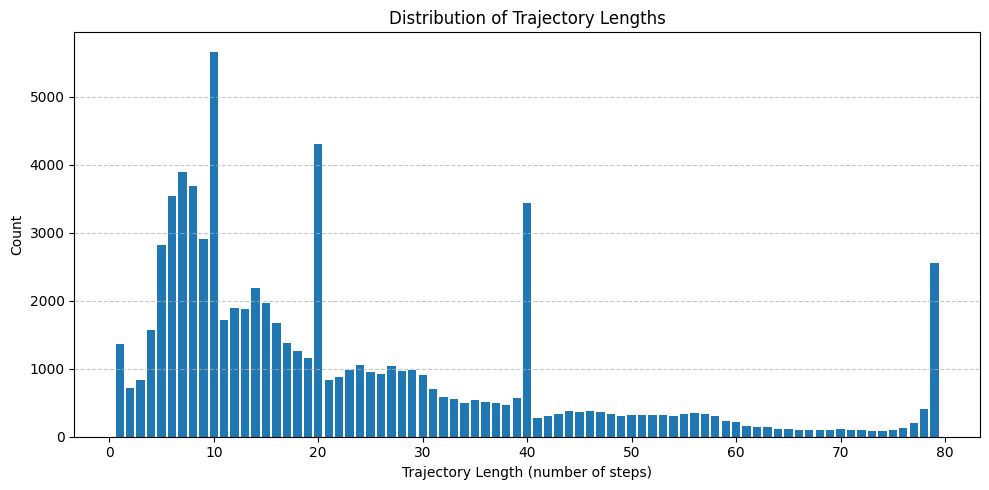

In [6]:
# 6. Plot
plt.figure(figsize=(10, 5))
plt.bar(length_counts.index, length_counts.values)
plt.xlabel("Trajectory Length (number of steps)")
plt.ylabel("Count")
plt.title("Distribution of Trajectory Lengths")
# plt.xticks(ticks=length_counts.index)   # show every length
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 7. Save + show
plt.savefig("trajectory_lengths_combined.png", dpi=300)
plt.show()
